# ACOM Tutorial Notebook - Basics

In this tutorial, you will learn the basic concepts and syntax of the ACOM module in py4DSTEM.

### Acknowledgements

This tutorial notebook was written by Colin Ophus and Steven Zeltmann. Contact clophus@lbl.gov with any questions.

### Versioning

Last updated on 2022-01-13 with py4DSTEM v.0.12.6.

In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import py4DSTEM
import numpy as np

In [29]:
# Define gold structure using manual input of the crystal structure
pos = np.array([
    [0.0, 0.0, 0.0],
    [0.0, 0.5, 0.5],
    [0.5, 0.0, 0.5],
    [0.5, 0.5, 0.0],
])
atom_num = 79
a = 4.08
cell = a

crystal = py4DSTEM.process.diffraction.Crystal(
    pos, 
    atom_num, 
    cell)

In [30]:
# # Importing pymatgen - you need to install pymatgen if you want to use pymatgen structures or their cif importer.
# from pymatgen.core.structure import Structure, Lattice

In [31]:
# # Define gold using pymatgen
# a = 4.08
# fcc_Au = Structure(
#     Lattice.cubic(a), 
#     ["Au", "Au", "Au", "Au"], 
#     [
#     [0.0, 0.0, 0.0],
#     [0.0, 0.5, 0.5],
#     [0.5, 0.0, 0.5],
#     [0.5, 0.5, 0.0],
# ])
# crystal = py4DSTEM.process.diffraction.Crystal.from_pymatgen_structure(fcc_Au)

In [32]:
# Import the gold structure directly from The Material Project
# crystal = py4DSTEM.process.diffraction.Crystal.from_pymatgen_structure(
#     "mp-81",
#     MP_key = "Insert your own Materials project API key here!", 
# )

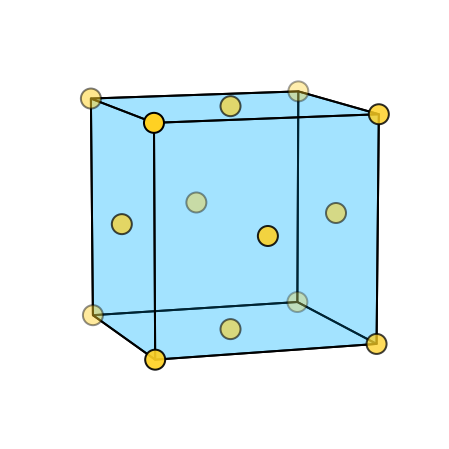

In [33]:
# Plot the structure
fig, ax = crystal.plot_structure(
    returnfig=True,
    zone_axis_lattice=[6,2,1],
    # proj_x_cartesian=[1,1,0],
)

In [34]:
# Save the structure plot
# fig.savefig('plot_00_atomic_struct.pdf')

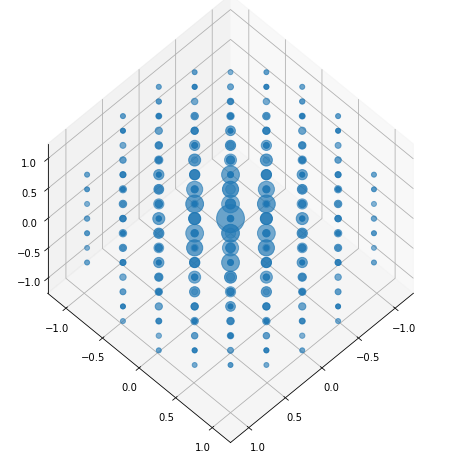

In [35]:
# Calculate and plot the structure factors
k_max = 1.5
crystal.calculate_structure_factors(k_max)

fig, ax = crystal.plot_structure_factors(
    zone_axis_lattice=[1,1,2],
    plot_limit=1.2,
    perspective_axes=False,
    scale_markers = 2000,
    returnfig=True)

In [36]:
# Save the structure factor plot
# fig.savefig('plot_01_structure_factors.pdf')

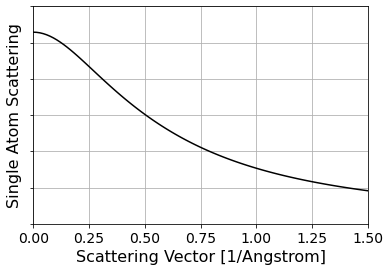

In [37]:
# plot the single atom scattering of Gold
q = np.linspace(0,crystal.k_max,100)

atom_sf = py4DSTEM.process.utils.single_atom_scatter(
    [crystal.numbers[0]],
    [1],
    q,
    'A')
atom_sf.get_scattering_factor(
    [crystal.numbers[0]],
    [1],
    q,
    'A');


fig, ax = py4DSTEM.visualize.show_qprofile(
    q,
    intensity=atom_sf.fe,
    ymax=12,
    figsize=(6,4),
    returnfig=True)

ax.set_xlabel(
    'Scattering Vector [1/Angstrom]',
    size=16)
ax.set_ylabel(
    'Single Atom Scattering',
    size=16)
ax.set_xlim([0, crystal.k_max]);

In [38]:
# Save single atom scattering plot
# fig.savefig('plot_00b_single_atom_scattering.pdf')

### Generate and plot some diffraction patterns

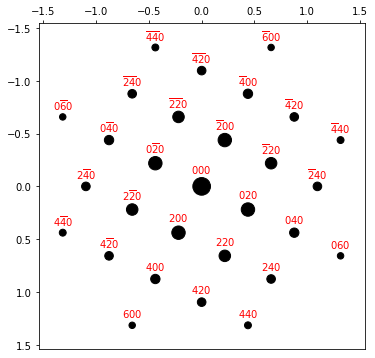

In [39]:
zone_axis_test = [0,0,1]  # Zone axis
x_proj_test = [2,1,0]  # in-plane projection vector

bragg_peaks = crystal.generate_diffraction_pattern(
    zone_axis_lattice = zone_axis_test,
    proj_x_lattice = x_proj_test,
    sigma_excitation_error=0.02)

py4DSTEM.process.diffraction.plot_diffraction_pattern(
    bragg_peaks,
)

### Testing orientation matching

In [40]:
# # Create an orientation plan
# crystal.orientation_plan(
#     angle_step_zone_axis = 2.0,
#     angle_step_in_plane = 2.0,
#     accel_voltage = 300e3,
#     corr_kernel_size=0.08,
# )

# Create an orientation plan with an automatic range of zone axes - this requires pymatgen to be installed!
crystal.orientation_plan(
    angle_step_zone_axis = 1.0,
    angle_step_in_plane = 2.0,
    accel_voltage = 300e3,
    corr_kernel_size=0.08,
    zone_axis_range='auto',
)

Automatically detected point group m-3m,
 using arguments: zone_axis_range = 
[[0 1 1]
 [1 1 1]], 
 fiber_axis=None, fiber_angles=None.


Orientation plan: 100%|██████████████████████████████████████████████████| 1596/1596 [00:00<00:00, 1675.54 zone axes/s]


In [41]:
# # Plot the zone axes included in the orientation plan
# fig, ax = crystal.plot_orientation_zones(
#     plot_limit=np.array([-0.8, 0.8]),
#     returnfig=True)

In [42]:
# Save the zone axes orientation map
# fig.savefig('plot_02_zone_axes.pdf')

In [43]:
# # Plot some of the orientation plans
# fig, ax = crystal.plot_orientation_plan(
#     zone_axis_lattice=[1,2,3],
#     returnfig=True,
# );

In [44]:
# Save the zone axes orientation map
# fig.savefig('plot_03_plan_05.pdf')

Input lattice zone axis    = ([0.267 0.535 0.802])
Best fit lattice directions: z axis = ([0.254 0.532 0.808]), x axis = ([0.361 0.589 0.723]), with corr value = 1.908


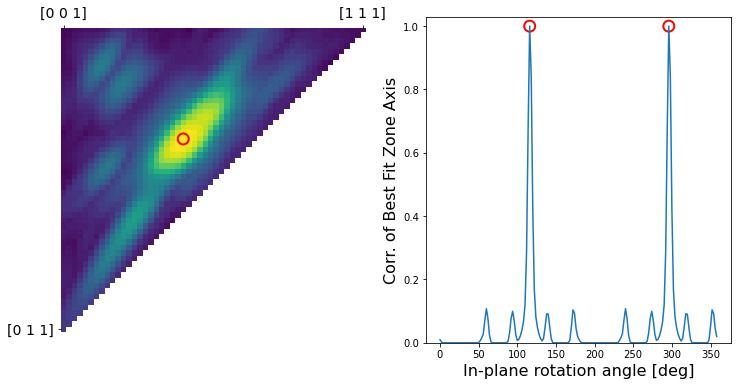

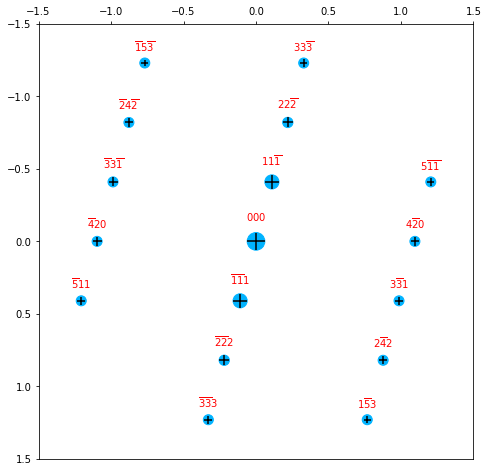

In [45]:
# Testing some matches - this cell shows the orientation correlogram, and the best match for both zone axis and in-plane rotation.
# zone_axis_test = [1,2,3]
# zone_axis_test = [-1,-2,-3]
# zone_axis_test = [0.2,0.4,0.7]
zone_axis_test = [1,2,3]

# proj_x_test = [-0.24,0.56,0]

bragg_peaks = crystal.generate_diffraction_pattern(
    zone_axis_lattice = zone_axis_test,
#     proj_x_lattice = proj_x_test,
    sigma_excitation_error=0.02)

# Print out zone axes after normalization
zone_axis_lattice = crystal.cartesian_to_lattice(zone_axis_test)
print('Input lattice zone axis    = (' + str(np.round(zone_axis_lattice,decimals=3)) + ')')

# Perform matching, and plot correlation images
orientation, fig, ax = crystal.match_single_pattern(
    bragg_peaks,
    figsize=[12,6],
    plot_corr=True,
    verbose=True,
    returnfig=True,
)

# plot the match overlaid onto the input data
bragg_peaks_fit = crystal.generate_diffraction_pattern(
    orientation,
    sigma_excitation_error=0.03)
py4DSTEM.process.diffraction.plot_diffraction_pattern(
    bragg_peaks_fit,
    bragg_peaks_compare=bragg_peaks,
    min_marker_size=100,
    plot_range_kx_ky=[k_max,k_max],
    figsize=(8,8)
)

In [46]:
# Save the correlation outputs
# fig.savefig('plot_04_match_00.pdf')

In [47]:
# Save the comparison plots
# fig.savefig('plot_05_comparison.pdf')

### Testing mean error of orientation plan

These further cells are for testing the mean error for a given orientation plan.  It uses the same zone axes as the orientation plan.

In [48]:
def vector_angle(a: np.ndarray, b: np.ndarray) -> float:
    theta = np.arccos(np.clip((a @ b) / (np.linalg.norm(a) * np.linalg.norm(b)), -1.0, 1.0))
    if theta > np.pi/2:
        theta = np.pi - theta
    return theta

In [49]:
# Fit all orientations included in the plan
orientations_test = crystal.orientation_rotation_matrices
test_patterns = py4DSTEM.io.datastructure.PointListArray(bragg_peaks.coordinates,(orientations_test.shape[0],1))

for a0 in range(orientations_test.shape[0]):
    test_patterns.get_pointlist(a0,0).add_dataarray(crystal.generate_diffraction_pattern(
        orientation_matrix=orientations_test[a0],
        sigma_excitation_error=0.02,
    ).data)
    
orientation_map = crystal.match_orientations(test_patterns)

Matching Orientations: 100%|███████████████████████████████████████████████| 1596/1596 [05:15<00:00,  5.05 PointList/s]


In [64]:
errors = np.zeros((orientations_test.shape[0],))
# for i,t in enumerate(orientations_test):
# #     errors[i] = vector_angle(t,orientation_map.matrix[i,0,0,:,2])
#     errors[i] = vector_angle(t,orientation_map.matrix[i,0,0,:,2])

for a0 in range(orientations_test.shape[0]):
# for a0 in range(2):
#     errors[i] = vector_angle(t,orientation_map.matrix[i,0,0,:,2])
    errors[a0] = vector_angle(
        orientations_test[a0,:,2],
        orientation_map.matrix[a0,0,0,:,2])
#     print(' ')
#     print(np.round(orientations_test[a0,:,:],decimals=3))
#     print(np.round(orientation_map.matrix[a0,0,0,:,:],decimals=3))

print('Mean angle error = ' + str(np.round(np.mean(errors)*180/np.pi, decimals=3)) + ' degrees')
    
error_img = np.ma.masked_array(np.zeros((crystal.orientation_zone_axis_steps+1, crystal.orientation_zone_axis_steps+1)),mask=True)
diff_intensity_img = np.ma.masked_array(np.zeros((crystal.orientation_zone_axis_steps+1, crystal.orientation_zone_axis_steps+1)),mask=True)
n_spots_img = np.ma.masked_array(np.zeros((crystal.orientation_zone_axis_steps+1, crystal.orientation_zone_axis_steps+1)),mask=True)
for a0 in np.arange(crystal.orientation_zone_axis_steps+1):
    inds = np.arange(a0*(a0+1)/2, a0*(a0+1)/2 + a0 + 1)
    inds_val = np.round(inds).astype('int')
    v = np.arange(a0+1)
    x_inds = a0 - v 
    y_inds = v
    inds1D = np.ravel_multi_index([x_inds,y_inds], error_img.shape)
    
    error_img.ravel()[inds1D] = errors[inds_val]
    error_img.ravel()[inds1D].mask = False
    
    diff_intensity_img[a0,range(a0+1)] = np.array([test_patterns.get_pointlist(i,0).data['intensity'].sum() for i in inds_val])
    diff_intensity_img[a0,range(a0+1)].mask = False
    
    n_spots_img[a0,range(a0+1)] = np.array([test_patterns.get_pointlist(i,0).data['intensity'].shape[0] for i in inds_val])
    n_spots_img[a0,range(a0+1)].mask = False

Mean angle error = 0.034 degrees


In [65]:
import matplotlib.pyplot as plt

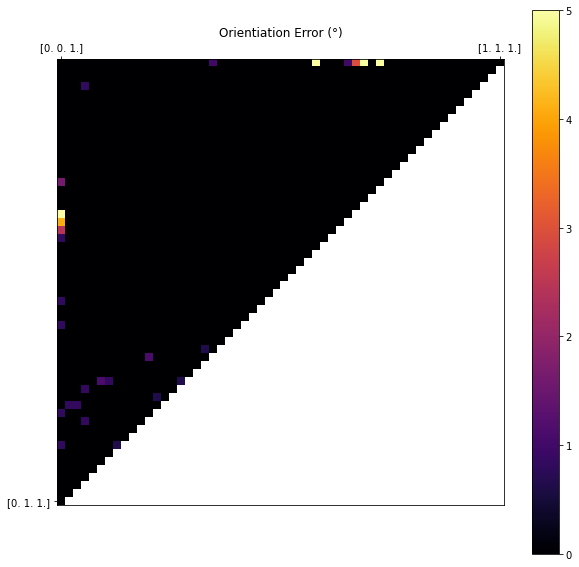

In [66]:
fig,ax = plt.subplots(figsize=(10,10))
cm = plt.cm.get_cmap("inferno").copy()
cm.set_bad('w')
im = ax.imshow(np.rad2deg(error_img),cmap=cm,vmin=0,vmax=5)

label_0 = crystal.orientation_zone_axis_range[0,:]
label_0 = np.round(label_0 * 1e3) * 1e-3
label_0 /= np.min(np.abs(label_0[np.abs(label_0)>0]))

label_1 = crystal.orientation_zone_axis_range[1,:]
label_1 = np.round(label_1 * 1e3) * 1e-3
label_1 /= np.min(np.abs(label_1[np.abs(label_1)>0]))

label_2 = crystal.orientation_zone_axis_range[2,:]
label_2 = np.round(label_2 * 1e3) * 1e-3
label_2 /= np.min(np.abs(label_2[np.abs(label_2)>0]))

ax.set_yticks([crystal.orientation_zone_axis_steps])
ax.set_yticklabels([
    str(label_1)])

ax.set_xticks([0, crystal.orientation_zone_axis_steps])
ax.set_xticklabels([
    str(label_0),
    str(label_2)])
ax.xaxis.tick_top()

ax.set_title("Orientiation Error (°)")

fig.colorbar(im)
plt.show()

In [42]:
# Save the correlation outputs
# fig.savefig('plot_11_errors_2deg_kmax_2p0_sigma_0p08.pdf')